# 03_clustering.ipynb
KMeans 聚类分析与聚类可视化

---

## 1. 导入与数据

```python

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/china_50_cities.csv', parse_dates=['Datetime'])
polls = ['CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']

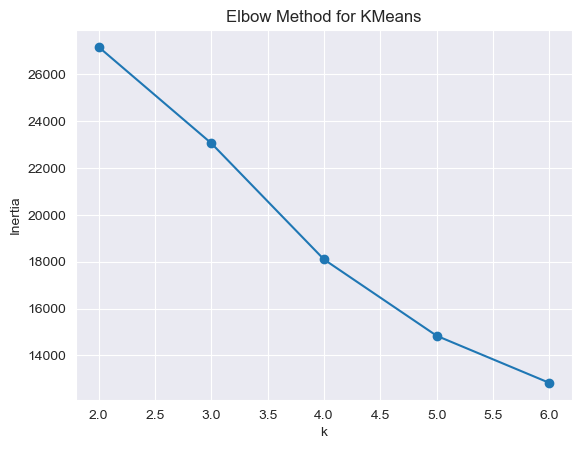

In [2]:
X = StandardScaler().fit_transform(df[polls].fillna(0))
inertia = []
for k in range(2,7):
    inertia.append(KMeans(n_clusters=k, random_state=42).fit(X).inertia_)
plt.plot(range(2,7), inertia, marker='o')
plt.title('Elbow Method for KMeans')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


In [3]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df['Cluster'] = kmeans.labels_


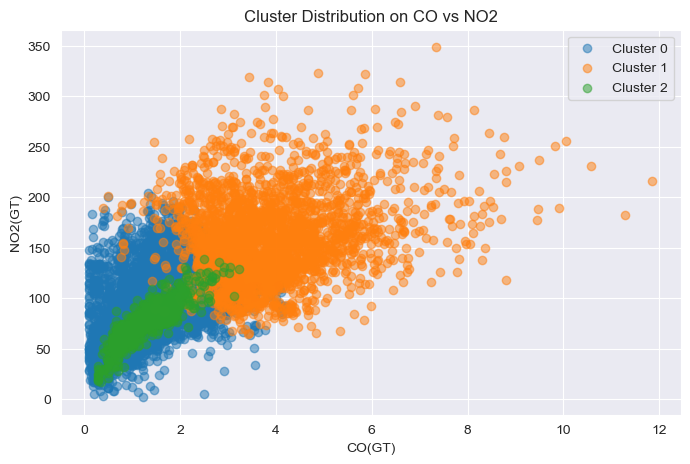

In [4]:
plt.figure(figsize=(8,5))
for cid in sorted(df['Cluster'].unique()):
    sub = df[df['Cluster']==cid]
    plt.scatter(sub['CO(GT)'], sub['NO2(GT)'], label=f'Cluster {cid}', alpha=0.5)
plt.xlabel('CO(GT)')
plt.ylabel('NO2(GT)')
plt.title('Cluster Distribution on CO vs NO2')
plt.legend()
plt.show()
